In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
import pandas as pd

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
fetch_housing_data()

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c3a39e8>,
      dtype=object)

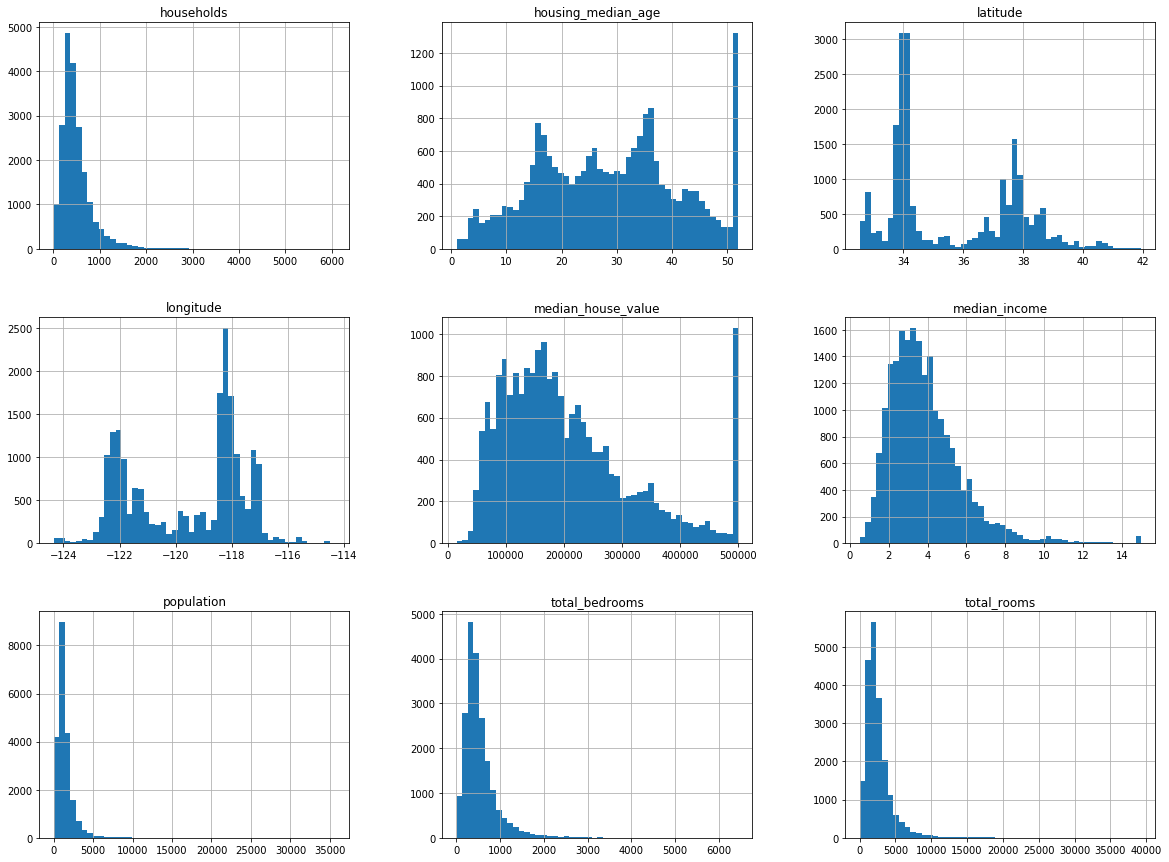

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

In [12]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), " test")

16512 train + 4128  test


In [14]:
import hashlib

In [15]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=32)

In [19]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

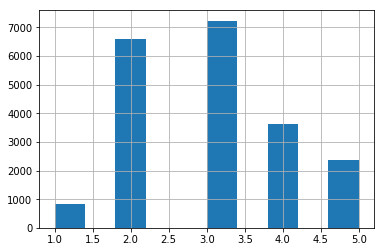

In [20]:
housing['income_cat'].hist()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=32)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
strat_income_cat = strat_test_set['income_cat'].value_counts() / len(strat_test_set)

In [24]:
overall_income_cat = housing["income_cat"].value_counts() / len(housing)

In [25]:
random_train_set, random_test_set = train_test_split(housing, test_size=0.2, random_state=32)
random_income_cat = random_test_set['income_cat'].value_counts() / len(random_test_set)

In [26]:
random_income_error = ((random_income_cat - overall_income_cat) / overall_income_cat) * 100
strat_income_error = ((strat_income_cat - overall_income_cat) / overall_income_cat) * 100

In [27]:
pd.DataFrame({
    "Overall": overall_income_cat, 
    "Random": random_income_cat, 
    "Strat": strat_income_cat, 
    "Rand. %error": random_income_error,
    "Strat. %error": strat_income_error}
).sort_index()

,Overall,Random,Strat,Rand. %error,Strat. %error
1.0,0.039826,0.040455,0.039729,1.581509,-0.243309
2.0,0.318847,0.320494,0.318798,0.516639,-0.015195
3.0,0.350581,0.347868,0.350533,-0.773908,-0.013820
4.0,0.176308,0.180233,0.176357,2.225886,0.027480
5.0,0.114438,0.110950,0.114583,-3.048264,0.127011


In [28]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [29]:
housing = strat_train_set.copy()

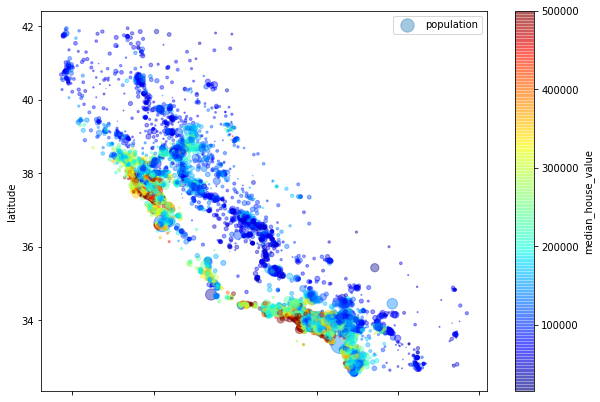

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"),
            colorbar=True, figsize=(10,7))
plt.legend()

In [31]:
corr_matrix = housing.corr()

In [32]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684207
total_rooms           0.133901
housing_median_age    0.111455
households            0.066245
total_bedrooms        0.050326
population           -0.026850
longitude            -0.044055
latitude             -0.145770
Name: median_house_value, dtype: float64

In [33]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c9c5128>,
      dtype=object)

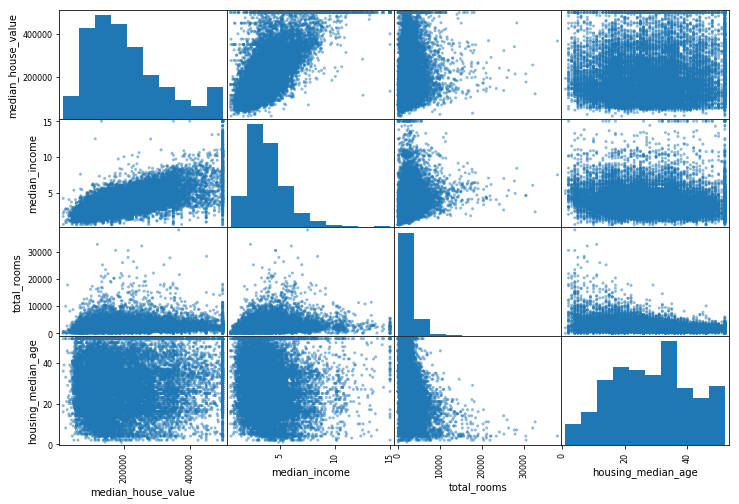

In [34]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

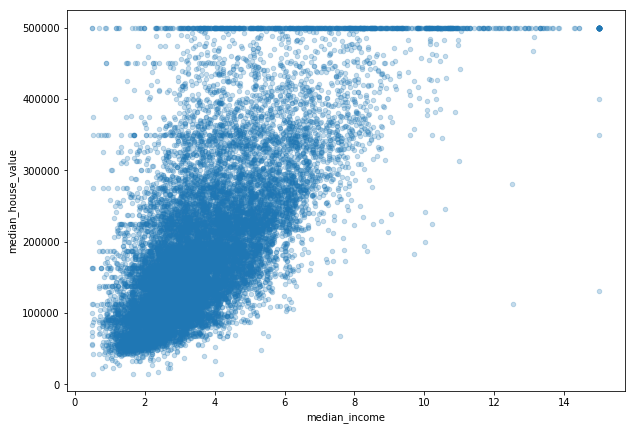

In [35]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(10,7), alpha=.25)

In [36]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [37]:
corr_matrix = housing.corr()

In [38]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.684207
rooms_per_household         0.166679
total_rooms                 0.133901
housing_median_age          0.111455
households                  0.066245
total_bedrooms              0.050326
population                 -0.026850
population_per_household   -0.033081
longitude                  -0.044055
latitude                   -0.145770
bedrooms_per_room          -0.250069
Name: median_house_value, dtype: float64

In [39]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy() 

In [110]:
from sklearn.impute import SimpleImputer

In [111]:
imputer = SimpleImputer(strategy="median")

In [42]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [43]:
X = imputer.transform(housing_num)

In [44]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.05,33.10,13.0,5516.0,746.0,2119.0,662.0,6.1868
1,-118.16,34.09,50.0,1568.0,302.0,1093.0,333.0,3.1442
2,-121.99,38.26,18.0,921.0,126.0,368.0,120.0,6.0842
3,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654
4,-117.00,32.76,31.0,2545.0,373.0,956.0,342.0,4.3977


In [45]:
housing_cat = housing["ocean_proximity"]
housing_cat.head()

15566     <1H OCEAN
4469      <1H OCEAN
18984        INLAND
1854     NEAR OCEAN
15038     <1H OCEAN
Name: ocean_proximity, dtype: object

In [46]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [47]:
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 0, 1, 0, 0, 1])

In [48]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [129]:
list(housing.columns).index("total_rooms")
[list(housing.columns).index(col) for col in ["total_rooms", "total_bedrooms", "population", "households"]]

[3, 4, 5, 6]

In [132]:
from sklearn.base import BaseEstimator, TransformerMixin
# rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
housing_columns = list(housing.columns)
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    housing_columns.index(col) for col in ["total_rooms", "total_bedrooms", "population", "households"]]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]    

In [125]:
attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing.values)

array([[-117.05, 33.1, 13.0, ..., 8.332326283987916, 3.200906344410876,
        0.1352429296591733],
       [-118.16, 34.09, 50.0, ..., 4.708708708708708, 3.2822822822822824,
        0.19260204081632654],
       [-121.99, 38.26, 18.0, ..., 7.675, 3.066666666666667,
        0.13680781758957655],
       ...,
       [-118.31, 33.91, 31.0, ..., 4.896193771626297, 3.0242214532871974,
        0.23957597173144876],
       [-122.24, 38.11, 52.0, ..., 4.427645788336933, 2.7580993520518358,
        0.24],
       [-117.62, 34.11, 17.0, ..., 7.133587786259542, 3.1717557251908395,
        0.16639914392723382]], dtype=object)

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [112]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [113]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_names):
        self.attributes_names = attributes_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attributes_names]

In [114]:
class Selector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attributes_names):
        self.attributes_names = attributes_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attributes_names].values

In [115]:
# class CategoricalEncoder(BaseEstimator, TransformerMixin):
#     from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#     def __init__(self, encoder=OneHotEncoder(sparse=False)):
#         self.encoder = encoder
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X, y=None):
#         # data = LabelEncoder().fit_transform(X)
#         rows, columns = X.shape
#         if columns == 1:
#             # data = OneHotEncoder(sparse=False).fit_transform(data.reshape(-1, 1))
#             data = self.encoder.fit_transform(X.reshape(-1, 1))
#         else:
#             # data = OneHotEncoder(sparse=False).fit_transform(data)
#             data = self.encoder.fit_transform(X)
#         return data
#     def get_encoder():
#         return self.encoder        

In [119]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("df_selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("df_selector", DataFrameSelector(cat_attribs)),    
    ("cat_encoder", OneHotEncoder(sparse=False))
])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [122]:
# housing_prepared

In [123]:
# housing_prepared.shape

In [62]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
housing_predictions = lin_reg.predict(housing_prepared)
print("Predictions: ", housing_predictions)

Predictions:  [278046.48434544 200565.75422022 240528.75346119 ... 226221.41505172
 220201.78763887 233265.02349784]


In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [66]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68595.88265120868

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [69]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [72]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [71024.21502151 68250.05076883 68853.79692407 70363.85087472
 70112.98251257 71089.23703582 69955.40116351 71446.40891592
 72475.94782742 72190.65151728]
Mean:  70576.25425616458
Standard deviation  1282.941147741984


In [73]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [70289.17346374 73538.6486289  70971.75360445 67673.25241105
 67777.91369306 67132.78566827 69880.40440077 66181.12646154
 69550.802107   67687.47845192]
Mean:  69068.33388906924
Standard deviation  2087.819816123742


In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores:  [51262.22428257 52454.20970008 54117.61333715 53151.01446852
 54125.99274554 50903.56047702 55440.78791522 52871.34544463
 53414.72936152 52029.12903818]
Mean:  52977.060677042304
Standard deviation  1316.6571747156986


In [76]:
from sklearn.externals import joblib

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [77]:
joblib.dump(lin_reg, "chapter_2_lin_reg.pkl")
joblib.dump(tree_reg, "chapter_2_tree_reg.pkl")
joblib.dump(forest_reg, "chapter_2_forest_reg.pkl")

['chapter_2_forest_reg.pkl']

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = [
    {"n_estimators": [30, 50, 80], "max_features": [6, 8, 10]},
#     {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [6, 8, 10],
  

In [80]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 80}

In [81]:
cvres = grid_search.cv_results_

In [82]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49820.18408382928 {'max_features': 6, 'n_estimators': 30}
49462.37745890917 {'max_features': 6, 'n_estimators': 50}
49404.13022510654 {'max_features': 6, 'n_estimators': 80}
50305.286030828254 {'max_features': 8, 'n_estimators': 30}
49784.367709907216 {'max_features': 8, 'n_estimators': 50}
49408.55772553451 {'max_features': 8, 'n_estimators': 80}
50245.901852050294 {'max_features': 10, 'n_estimators': 30}
49820.190747226676 {'max_features': 10, 'n_estimators': 50}
49661.95666264868 {'max_features': 10, 'n_estimators': 80}


In [83]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.59966772e-02, 6.86156316e-02, 4.26228924e-02, 1.76548944e-02,
       1.68001601e-02, 1.78395281e-02, 1.58319784e-02, 3.51702812e-01,
       5.02954325e-02, 1.06910183e-01, 6.36171342e-02, 1.35806249e-02,
       1.51291748e-01, 5.13192484e-05, 2.66870330e-03, 4.52028016e-03])

In [85]:
extra_attribs = ["rooms_per_household", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
print(cat_encoder.categories_)
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
attributes

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [117]:
feat_with_relevance = sorted(zip(feature_importances, attributes), reverse=True)
feat_with_relevance

[(0.35170281213905835, 'median_income'),
 (0.15129174793583053, 'INLAND'),
 (0.10691018342805146, 'pop_per_hhold'),
 (0.07599667723684246, 'longitude'),
 (0.06861563159383892, 'latitude'),
 (0.06361713423109665, 'bedrooms_per_room'),
 (0.050295432472240546, 'rooms_per_household'),
 (0.04262289241105995, 'housing_median_age'),
 (0.01783952813437947, 'population'),
 (0.01765489438489642, 'total_rooms'),
 (0.016800160064613094, 'total_bedrooms'),
 (0.015831978385769958, 'households'),
 (0.013580624875628179, '<1H OCEAN'),
 (0.004520280162694801, 'NEAR OCEAN'),
 (0.0026687032956367487, 'NEAR BAY'),
 (5.1319248362463294e-05, 'ISLAND')]

In [118]:
relevant_features = [feat for rank, feat in feat_with_relevance if rank > 0.01]
relevant_features

['median_income',
 'INLAND',
 'pop_per_hhold',
 'longitude',
 'latitude',
 'bedrooms_per_room',
 'rooms_per_household',
 'housing_median_age',
 'population',
 'total_rooms',
 'total_bedrooms',
 'households',
 '<1H OCEAN']

In [87]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [88]:
final_rmse

47868.29350731436

### Exercises

In [90]:
from sklearn.svm import SVR
svr_reg = SVR(gamma="auto")
svr_scores = cross_val_score(svr_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [93]:
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

Scores:  [120296.68886761 119350.91246416 119158.09090543 119803.13769009
 114145.75942248 116850.05790411 118365.92364634 117920.65788233
 121153.43707461 115758.32544552]
Mean:  118280.29913026681
Standard deviation  2054.1068867621966


In [94]:
param_grid = [
    {"C": [0.1, 0.5, 1.0], "gamma": ["scale"], "kernel": ["linear", "poly", "rbf", "sigmoid"]},
]
svr_reg = SVR()
grid_search = GridSearchCV(svr_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 0.5, 1.0], 'gamma': ['scale'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [95]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

117915.35917764442 {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
118643.1764343015 {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
118582.89069234538 {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
118562.93595312204 {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
115264.91073608938 {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
118513.3855369291 {'C': 0.5, 'gamma': 'scale', 'kernel': 'poly'}
118470.53490665676 {'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
118359.2015722882 {'C': 0.5, 'gamma': 'scale', 'kernel': 'sigmoid'}
112208.8376015735 {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
118318.13586941577 {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
118327.92426580878 {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
118097.6839428082 {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
param_dist = {
    "C": [0.1, 0.5, 1.0], 
    "gamma": ["scale"], 
    "kernel": ["linear", "poly", "rbf", "sigmoid"]}
svr_reg = SVR()
random_search = RandomizedSearchCV(svr_reg, param_distributions=param_dist, n_iter=10, cv=5, scoring="neg_mean_squared_error")
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 0.5, 1.0],
                                        'gamma': ['scale'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [163]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

In [164]:
indices_of_top_k(feature_importances, 10)

array([ 0,  1,  2,  3,  5,  7,  8,  9, 10, 12])

In [152]:
class TopAttributesSelector (BaseEstimator, TransformerMixin):
    def __init__(self, features, feat_with_relevance):
        self.feat_with_relevance = feat_with_relevance
        self.features = features
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        print(feat_with_relevance)
        relevant_features = [feat for rank, feat in self.feat_with_relevance if rank > 0.01]
        relevant_features_ix = [self.features.index(col) for col in relevant_features]
        return X[:, relevant_features_ix].values

In [153]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("df_selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("df_selector", DataFrameSelector(cat_attribs)),    
    ("cat_encoder", OneHotEncoder(sparse=False))
])

relevant_pipeline = Pipeline([
    ("selector", TopAttributesSelector(list(housing.columns), feat_with_relevance))
])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    ("rel_pipeline", relevant_pipeline)
])

housing_prepared = full_pipeline.fit_transform(housing)

[(0.35170281213905835, 'median_income'), (0.15129174793583053, 'INLAND'), (0.10691018342805146, 'pop_per_hhold'), (0.07599667723684246, 'longitude'), (0.06861563159383892, 'latitude'), (0.06361713423109665, 'bedrooms_per_room'), (0.050295432472240546, 'rooms_per_household'), (0.04262289241105995, 'housing_median_age'), (0.01783952813437947, 'population'), (0.01765489438489642, 'total_rooms'), (0.016800160064613094, 'total_bedrooms'), (0.015831978385769958, 'households'), (0.013580624875628179, '<1H OCEAN'), (0.004520280162694801, 'NEAR OCEAN'), (0.0026687032956367487, 'NEAR BAY'), (5.1319248362463294e-05, 'ISLAND')]


ValueError: 'INLAND' is not in list